In [69]:
import pandas as pd
!pip3 install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator as RFE
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 3 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_bjj4b2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.475 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [70]:
sales = pd.read_csv("/sales.csv")
geo_params = pd.read_csv("/geo_params.csv")
sku = pd.read_csv("/sku.csv")

In [71]:
joined = sales.join(sku.set_index('SKU'), on = 'SKU', how = 'inner')
#joined = joined.drop(['Type','ID','SKU', 'Units', 'countryOfOrigin', 'trademark', 'brandId'], axis = 1)
joined = joined.drop(['ID'], axis = 1)
joined = joined.dropna(axis = 0, subset = ['sales', 'price'])
joined[["Year", "Month", "Day"]] = joined.date.str.split(pat='-',expand=True)
joined['date'] = pd.to_datetime(joined['date'])
joined['dotw']= joined['date'].dt.day_name()
#joined = joined.drop(['date'], axis = 1)
joined

,geoCluster,SKU,date,price,sales,Category,Type,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin,Group,Year,Month,Day,dotw
0,92,32485,2021-07-05,38.29,4.0,Banana,Banana — Plain,NaN,1.0,NaN,NaN,NaN,Tropical fruits,2021,07,05,Monday
2,112,32485,2021-05-27,45.39,3.7,Banana,Banana — Plain,NaN,1.0,NaN,NaN,NaN,Tropical fruits,2021,05,27,Thursday
75,131,32485,2021-04-20,43.99,2.3,Banana,Banana — Plain,NaN,1.0,NaN,NaN,NaN,Tropical fruits,2021,04,20,Tuesday
152,148,32485,2021-04-26,46.79,3.5,Banana,Banana — Plain,NaN,1.0,NaN,NaN,NaN,Tropical fruits,2021,04,26,Monday
160,148,32485,2021-05-04,38.39,4.0,Banana,Banana — Plain,NaN,1.0,NaN,NaN,NaN,Tropical fruits,2021,05,04,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4604750,3209,362721,2021-06-30,36.99,2.0,"Plain fancy cake, own production",Cupcake,NaN,300.0,NaN,9666.0,1.0,Bakery,2021,06,30,Wednesday
4604751,3209,362721,2021-07-01,36.99,1.0,"Plain fancy cake, own production",Cupcake,NaN,300.0,NaN,9666.0,1.0,Bakery,2021,07,01,Thursday
4604752,3209,362721,2021-07-02,36.99,2.0,"Plain fancy cake, own production",Cupcake,NaN,300.0,NaN,9666.0,1.0,Bakery,2021,07,02,Friday
4604754,3209,362721,2021-07-04,36.99,8.0,"Plain fancy cake, own production",Cupcake,NaN,300.0,NaN,9666.0,1.0,Bakery,2021,07,04,Sunday


#Random forest

In [72]:
shuffled=joined.sample(frac=1, random_state=1)
h2o_joined = h2o.H2OFrame(shuffled)
h2o_joined

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


geoCluster,SKU,date,price,sales,Category,Type,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin,Group,Year,Month,Day,dotw
2264,16649,2021-02-26 00:00:00,18.09,6,"Water, still",Table water — PET — from 1 to 2 L — Still,1241,1.5,nan,1323,1,Mineral water,2021,2,26,Friday
2077,543663,2021-04-01 00:00:00,424.69,0.5,"Soft cheese, white mold",soft cheese — More expensive — Import — White mold — Brie,2737,1,nan,8802,6,Cheese,2021,4,1,Thursday
2750,224200,2020-10-11 00:00:00,23.49,3,"Plain wheat bread, toast-type, own production",Bread — plain — wheat,nan,550,nan,9666,1,Bakery,2020,10,11,Sunday
2013,567970,2021-01-21 00:00:00,26.39,1,"Plain baguette loaf baked in the hearth, own production",Baguette loaf — plain,2737,300,nan,9974,1,Bakery,2021,1,21,Thursday
2053,32546,2021-06-02 00:00:00,40.79,4,Orange,Citrus fruit — Orange — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,6,2,Wednesday
2383,503007,2020-06-17 00:00:00,30.59,2,"Plain rye-wheat bread, parbaking",Bread — plain — rye-wheat,8274,340,nan,nan,1,Bakery,2020,6,17,Wednesday
2177,787133,2021-01-01 00:00:00,81.69,1,Avocado,Tropical fruit — Avocado — Ready to Eat,nan,2,nan,9666,nan,Tropical fruits,2021,1,1,Friday
2069,47330,2020-04-09 00:00:00,240.09,1,Semi-hard coarse-pored cheese,semi-hard cheese — More expensive — National — Available import,2737,1,nan,297,16,Cheese,2020,4,9,Thursday
1999,20872,2021-06-07 00:00:00,37.69,2,"Water, sparkling",Therapeutic-table water — PET — from 1 to 2 L,2693,1.5,nan,4384,1,Mineral water,2021,6,7,Monday
2542,89074,2021-02-25 00:00:00,20.69,5,Milk cakes,Sponge cake,2724,28,nan,1835,nan,Yogurts,2021,2,25,Thursday


In [73]:
# Set the predictors and response;
predictors = ["geoCluster","price","Category","Type", "brandId", "lagerUnitQuantity","Units", "trademark", "countryOfOrigin","Group", "Month", "Year", "dotw"]
response = "sales"
# set the response as a factor:
h2o_joined["Category"] = h2o_joined["Category"].asfactor()
h2o_joined["countryOfOrigin"] = h2o_joined["countryOfOrigin"].asfactor()
h2o_joined["trademark"] = h2o_joined["trademark"].asfactor()
h2o_joined["geoCluster"] = h2o_joined["geoCluster"].asfactor()
h2o_joined["Group"] = h2o_joined["Group"].asfactor()
h2o_joined["Type"] = h2o_joined["Type"].asfactor()
h2o_joined["dotw"] = h2o_joined["dotw"].asfactor()
h2o_joined

geoCluster,SKU,date,price,sales,Category,Type,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin,Group,Year,Month,Day,dotw
2264,16649,2021-02-26 00:00:00,18.09,6,"Water, still",Table water — PET — from 1 to 2 L — Still,1241,1.5,nan,1323,1,Mineral water,2021,2,26,Friday
2077,543663,2021-04-01 00:00:00,424.69,0.5,"Soft cheese, white mold",soft cheese — More expensive — Import — White mold — Brie,2737,1,nan,8802,6,Cheese,2021,4,1,Thursday
2750,224200,2020-10-11 00:00:00,23.49,3,"Plain wheat bread, toast-type, own production",Bread — plain — wheat,nan,550,nan,9666,1,Bakery,2020,10,11,Sunday
2013,567970,2021-01-21 00:00:00,26.39,1,"Plain baguette loaf baked in the hearth, own production",Baguette loaf — plain,2737,300,nan,9974,1,Bakery,2021,1,21,Thursday
2053,32546,2021-06-02 00:00:00,40.79,4,Orange,Citrus fruit — Orange — Plain,nan,1,nan,,nan,Tropical fruits,2021,6,2,Wednesday
2383,503007,2020-06-17 00:00:00,30.59,2,"Plain rye-wheat bread, parbaking",Bread — plain — rye-wheat,8274,340,nan,,1,Bakery,2020,6,17,Wednesday
2177,787133,2021-01-01 00:00:00,81.69,1,Avocado,Tropical fruit — Avocado — Ready to Eat,nan,2,nan,9666,nan,Tropical fruits,2021,1,1,Friday
2069,47330,2020-04-09 00:00:00,240.09,1,Semi-hard coarse-pored cheese,semi-hard cheese — More expensive — National — Available import,2737,1,nan,297,16,Cheese,2020,4,9,Thursday
1999,20872,2021-06-07 00:00:00,37.69,2,"Water, sparkling",Therapeutic-table water — PET — from 1 to 2 L,2693,1.5,nan,4384,1,Mineral water,2021,6,7,Monday
2542,89074,2021-02-25 00:00:00,20.69,5,Milk cakes,Sponge cake,2724,28,nan,1835,nan,Yogurts,2021,2,25,Thursday


In [74]:
# Split the dataset into a train and valid set:
train, valid = h2o_joined.split_frame(ratios=[.9], seed=1234)

# Build and train the model:
model = RFE(ntrees=10,
            max_depth=5,
            min_rows=5000,
            calibration_frame=valid)

model.train(x=predictors,
               y=response,
               training_frame=train,
               validation_frame=valid)

# Eval performance:
perf = model.model_performance()

# Generate predictions on a validation set (if necessary):
pred =  model.predict(valid)

drf Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [Units]
  warnings.warn(mesg["message"], RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Calibration frame was specified but calibration was not requested.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [75]:
model.download_mojo("my_gbm_mojo.zip")
valid

geoCluster,SKU,date,price,sales,Category,Type,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin,Group,Year,Month,Day,dotw
2013,567970,2021-01-21 00:00:00,26.39,1,"Plain baguette loaf baked in the hearth, own production",Baguette loaf — plain,2737,300,nan,9974,1,Bakery,2021,1,21,Thursday
2542,89074,2021-02-25 00:00:00,20.69,5,Milk cakes,Sponge cake,2724,28,nan,1835,nan,Yogurts,2021,2,25,Thursday
1999,369071,2021-04-24 00:00:00,15.69,6,"Water, still",Table water — PET — from 1 to 2 L — Still,1330,2,nan,2781,1,Mineral water,2021,4,24,Saturday
2270,690818,2020-11-13 00:00:00,15.99,4,"Ciabatta, light, plain, parbaking",Ciabatta,8274,250,nan,4043,nan,Bakery,2020,11,13,Friday
2259,32550,2020-12-25 00:00:00,58.29,4.7,Lemon,Citrus fruit — Lemon — Plain,nan,1,nan,,nan,Tropical fruits,2020,12,25,Friday
2120,369071,2021-02-14 00:00:00,19.69,4,"Water, still",Table water — PET — from 1 to 2 L — Still,1330,2,nan,2781,1,Mineral water,2021,2,14,Sunday
2577,591899,2021-05-15 00:00:00,82.49,0.5,"Flavored wheat bread baked in the hearth, own production",Bread — flavored,nan,1,nan,15156,1,Bakery,2021,5,15,Saturday
2171,690818,2020-09-01 00:00:00,17.09,2,"Ciabatta, light, plain, parbaking",Ciabatta,8274,250,nan,4043,nan,Bakery,2020,9,1,Tuesday
2542,571255,2021-02-27 00:00:00,255.59,2,Semi-hard coarse-pored cheese,semi-hard cheese — More expensive — National — Available import,2737,1,nan,1037,33,Cheese,2021,2,27,Saturday
2735,208,2021-02-01 00:00:00,15.59,2,"Water, sparkling",Therapeutic-table water — PET — from 1 to 2 L,1241,1.5,nan,3670,1,Mineral water,2021,2,1,Monday


In [76]:
perf


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 14.979483152187747
RMSE: 3.8703337262034325
MAE: 1.9401738551033412
RMSLE: 0.49526404077733666
Mean Residual Deviance: 14.979483152187747


In [77]:
pred

predict
3.15915
3.94017
4.60775
2.76589
1.99803
4.56954
0.992484
2.76589
0.763989
4.82277


In [78]:
valid["prediction"] = pred
valid[["prediction", "sales"]]
valid

geoCluster,SKU,date,price,sales,Category,Type,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin,Group,Year,Month,Day,dotw,prediction
2013,567970,2021-01-21 00:00:00,26.39,1,"Plain baguette loaf baked in the hearth, own production",Baguette loaf — plain,2737,300,nan,9974,1,Bakery,2021,1,21,Thursday,3.15915
2542,89074,2021-02-25 00:00:00,20.69,5,Milk cakes,Sponge cake,2724,28,nan,1835,nan,Yogurts,2021,2,25,Thursday,3.94017
1999,369071,2021-04-24 00:00:00,15.69,6,"Water, still",Table water — PET — from 1 to 2 L — Still,1330,2,nan,2781,1,Mineral water,2021,4,24,Saturday,4.60775
2270,690818,2020-11-13 00:00:00,15.99,4,"Ciabatta, light, plain, parbaking",Ciabatta,8274,250,nan,4043,nan,Bakery,2020,11,13,Friday,2.76589
2259,32550,2020-12-25 00:00:00,58.29,4.7,Lemon,Citrus fruit — Lemon — Plain,nan,1,nan,,nan,Tropical fruits,2020,12,25,Friday,1.99803
2120,369071,2021-02-14 00:00:00,19.69,4,"Water, still",Table water — PET — from 1 to 2 L — Still,1330,2,nan,2781,1,Mineral water,2021,2,14,Sunday,4.56954
2577,591899,2021-05-15 00:00:00,82.49,0.5,"Flavored wheat bread baked in the hearth, own production",Bread — flavored,nan,1,nan,15156,1,Bakery,2021,5,15,Saturday,0.992484
2171,690818,2020-09-01 00:00:00,17.09,2,"Ciabatta, light, plain, parbaking",Ciabatta,8274,250,nan,4043,nan,Bakery,2020,9,1,Tuesday,2.76589
2542,571255,2021-02-27 00:00:00,255.59,2,Semi-hard coarse-pored cheese,semi-hard cheese — More expensive — National — Available import,2737,1,nan,1037,33,Cheese,2021,2,27,Saturday,0.763989
2735,208,2021-02-01 00:00:00,15.59,2,"Water, sparkling",Therapeutic-table water — PET — from 1 to 2 L,1241,1.5,nan,3670,1,Mineral water,2021,2,1,Monday,4.82277


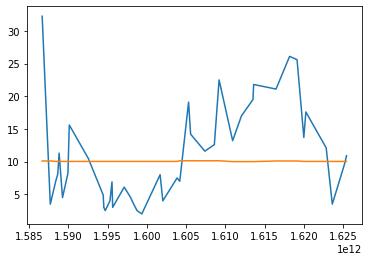

In [79]:
import matplotlib.pyplot as plt
new = valid[(valid["SKU"]==32485) & (valid["geoCluster"] == '2069')]
new = new.as_data_frame().sort_values(by = "date")
plt.plot(new["date"],new["sales"])
plt.plot(new["date"],new["prediction"])

#Visualize the tree

In [80]:
import subprocess
from IPython.display import Image

mojo_file_name = "/content/my_gbm_mojo.zip"
h2o_jar_path= '/content/tools/h2o-3/h2o-3.14.0.3/h2o.jar'
mojo_full_path = mojo_file_name
gv_file_path = "/content//my_gbm_graph.gv"
image_file_name = " /content/my_gbm_tree"
model.download_mojo(mojo_file_name)

def generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, tree_id = 0):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), "-i", mojo_full_path , "-o", gv_file_path ], shell=False)
    result = subprocess.call(["ls",gv_file_path], shell = False)
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else: 
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")

def generateTreeImage(gv_file_path, image_file_path, tree_id):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")

generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_name, 3)
generateTreeImage(gv_file_path, image_file_name, 3)
# Just pass the Tree Image file name depending on your tree
#Image(filename='/content/my_gbm_tree_0.png')

Error: Graphviz file /content//my_gbm_graph.gv could not be generated.
Error: Image file  /content/my_gbm_tree_3.png could not be generated.


In [81]:
test = pd.read_csv("test.csv")
test

,ID,geoCluster,SKU,date,price_filled,sales
0,RR27956447,21,32485,2021-07-08,39.69,NaN
1,RR27956448,21,32485,2021-07-09,39.69,NaN
2,RR27956449,21,32485,2021-07-10,39.69,NaN
3,RR27956450,21,32485,2021-07-11,39.69,NaN
4,RR27956451,21,32485,2021-07-12,39.69,NaN
...,...,...,...,...,...,...
202732,RR55912539,3230,711838,2021-07-15,28.49,NaN
202733,RR55912540,3230,711838,2021-07-16,28.49,NaN
202734,RR55912541,3230,711838,2021-07-17,28.49,NaN
202735,RR55912542,3230,711838,2021-07-18,28.49,NaN


In [82]:
joined_test = test.join(sku.set_index('SKU'), on = 'SKU', how = 'inner')
joined_test = joined_test.drop(['ID'], axis = 1)
joined_test[["Year", "Month", "Day"]] = joined_test.date.str.split(pat='-',expand=True)
joined_test['date'] = pd.to_datetime(joined_test['date'])
joined_test['dotw']= joined_test['date'].dt.day_name()
joined_test['price'] = joined_test['price_filled']
joined_test.drop(['price_filled'], axis = 1)
h2o_joined_test = h2o.H2OFrame(joined_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [83]:
h2o_joined_test

geoCluster,SKU,date,price_filled,sales,Category,Type,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin,Group,Year,Month,Day,dotw,price
21,32485,2021-07-08 00:00:00,39.69,nan,Banana,Banana — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,7,8,Thursday,39.69
21,32485,2021-07-09 00:00:00,39.69,nan,Banana,Banana — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,7,9,Friday,39.69
21,32485,2021-07-10 00:00:00,39.69,nan,Banana,Banana — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,7,10,Saturday,39.69
21,32485,2021-07-11 00:00:00,39.69,nan,Banana,Banana — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,7,11,Sunday,39.69
21,32485,2021-07-12 00:00:00,39.69,nan,Banana,Banana — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,7,12,Monday,39.69
21,32485,2021-07-13 00:00:00,39.69,nan,Banana,Banana — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,7,13,Tuesday,39.69
21,32485,2021-07-14 00:00:00,39.69,nan,Banana,Banana — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,7,14,Wednesday,39.69
21,32485,2021-07-15 00:00:00,39.69,nan,Banana,Banana — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,7,15,Thursday,39.69
21,32485,2021-07-16 00:00:00,39.69,nan,Banana,Banana — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,7,16,Friday,39.69
21,32485,2021-07-17 00:00:00,39.69,nan,Banana,Banana — Plain,nan,1,nan,nan,nan,Tropical fruits,2021,7,17,Saturday,39.69


In [84]:
h2o_joined_test["Category"] = h2o_joined_test["Category"].asfactor()
h2o_joined_test["countryOfOrigin"] = h2o_joined_test["countryOfOrigin"].asfactor()
h2o_joined_test["trademark"] = h2o_joined_test["trademark"].asfactor()
h2o_joined_test["geoCluster"] = h2o_joined_test["geoCluster"].asfactor()
h2o_joined_test["Group"] = h2o_joined_test["Group"].asfactor()
h2o_joined_test["Type"] = h2o_joined_test["Type"].asfactor()
h2o_joined_test["dotw"] = h2o_joined_test["dotw"].asfactor()
h2o_joined_test = h2o_joined_test.drop(['sales'], axis = 1)
h2o_joined_test
pred =  model.predict(h2o_joined_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'geoCluster' has levels not trained on: ["21", "298", "447", "493", "645", "1673", "1887", "2723", "2953", "3000", "3079", "3086", "3095", "3154", "3167", "3183"]
  warnings.warn(w)
/usr/local/lib/python3.7/dist-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'trademark' has levels not trained on: ["1037.0", "1120.0", "1173.0", "1192.0", "11960.0", "1323.0", "15156.0", "1835.0", "1839.0", "1921.0", ...4 not listed..., "4043.0", "4384.0", "4891.0", "4970.0", "5070.0", "6133.0", "8802.0", "9666.0", "9974.0", "nan"]
  warnings.warn(w)


In [85]:
predictors

['geoCluster',
 'price',
 'Category',
 'Type',
 'brandId',
 'lagerUnitQuantity',
 'Units',
 'trademark',
 'countryOfOrigin',
 'Group',
 'Month',
 'Year',
 'dotw']

#Gradient Boosting Estimator

In [86]:
from h2o.estimators import H2OGradientBoostingEstimator
h2o.init()

# Build and train the model:
pros_gbm = H2OGradientBoostingEstimator(nfolds=5,
                                        seed=1111,
                                        keep_cross_validation_predictions = True)
pros_gbm.train(x=predictors, y=response, training_frame=h2o_joined)

# Eval performance:
perf = pros_gbm.model_performance(h2o_joined)

# Generate predictions on a test set (if necessary):
pred = pros_gbm.predict(h2o_joined)

# Extract feature interactions:
feature_interactions = pros_gbm.feature_interaction()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 4 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_bjj4b2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.389 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


gbm Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [Units]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [87]:
perf


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 11.487788620197085
RMSE: 3.389364043621913
MAE: 1.7214298534019936
RMSLE: 0.4490033562071233
Mean Residual Deviance: 11.487788620197085
